# Loan Eligibility Prediction using ML Algorithm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing all the necessary library
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [ ]:
#loading the dataset
dataframe_1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Machine Learning/dataSet_1.csv")
dataframe_2 = pd.read_csv("//content/drive/MyDrive/Colab Notebooks/Machine Learning/dataSet_2.csv")

In [ ]:
#Print information about dataSet_1
dataframe_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
#Print information about dataSet_2
dataframe_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [ ]:
print(dataframe_1.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [ ]:
print(dataframe_2.tail())

      Loan_ID Gender Married Dependents     Education Self_Employed  \
362  LP002971   Male     Yes         3+  Not Graduate           Yes   
363  LP002975   Male     Yes          0      Graduate            No   
364  LP002980   Male      No          0      Graduate            No   
365  LP002986   Male     Yes          0      Graduate            No   
366  LP002989   Male      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
362             4009               1777       113.0             360.0   
363             4158                709       115.0             360.0   
364             3250               1993       126.0             360.0   
365             5000               2393       158.0             360.0   
366             9200                  0        98.0             180.0   

     Credit_History Property_Area  
362             1.0         Urban  
363             1.0         Urban  
364             NaN     Se

In [ ]:
#Return description of the dataframe
dataframe_1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
#Checking the shape (total number of rows and columns) od datasets
print('Shape of dataSet_1: ', dataframe_1.shape)
print('Shape of dataSet_2: ', dataframe_2.shape)

Shape of dataSet_1:  (614, 13)
Shape of dataSet_2:  (367, 12)


In the above information, we can see that the number of columns in dataSet_1 is 13 with the loan status feature. In test data, we are going to predict the loan status; So there are only 12 columns.

In [ ]:
#Counting the value from 'Loan Status' column
dataframe_1["Loan_Status"].value_counts()

,count
Loan_Status,
Y,422
N,192


According to the dataSet_1, 422 people get the loan approval from the bank whereas 192 were rejected.

# Checking the null or missing values

In [ ]:
#Checking if there is any null or missing values in dataSet_1
dataframe_1.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
#Total number of the null values count
dataframe_1.isna().sum().sum()

149

There are 149 null values in the dataSet_1.

In [ ]:
#The percentage of null values in the dataSet_1
(dataframe_1.isna().sum().sum()/dataframe_1.size)*100

1.8667000751691305

In [ ]:
#Checking if there is any null or missing values in dataSet_2
dataframe_2.isnull().sum()

,0
Loan_ID,0
Gender,11
Married,0
Dependents,10
Education,0
Self_Employed,23
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,5
Loan_Amount_Term,6


In [ ]:
#Total number of the null values count
dataframe_2.isna().sum().sum()

84

There are 84 null values in the dataframe_2.

In [ ]:
# The  percentage of null values in the dataSet_2
(dataframe_2.isna().sum().sum()/dataframe_2.size)*100

1.9073569482288828

# Checking duplicates data


In [ ]:
#Checking duplicates data in dataSet_1
dataframe_1.duplicated().sum()

0

In [ ]:
#Checking duplicates data in dataSet_2
dataframe_2.duplicated().sum()

0

There were no duplicates in dataSet_1 and dataSet_2.

# Fill the missing data with the mode value


In [ ]:
#Adding mode values in null places for dataSet_1

print('Before filling missing values in dataSet_1\n\n', '#'*40, '\n')
null_cols = ['Credit_History', 'Self_Employed', 'LoanAmount','Dependents', 'Loan_Amount_Term', 'Gender', 'Married']

for col in null_cols:
    print(f"{col}:\n{dataframe_1[col].value_counts()}\n", "-"*50)
    dataframe_1[col] = dataframe_1[col].fillna( dataframe_1[col].dropna().mode().values[0])


dataframe_1.isnull().sum().sort_values(ascending = False)
print("After filling the missing values \n\n", "#"*50, "\n")
for col in null_cols:
    print(f"\n{col}:\n{dataframe_1[col].value_counts()}\n", "-"*50)

Before filling missing values in dataSet_1

 ######################################## 

Credit_History:
Credit_History
1.0    475
0.0     89
Name: count, dtype: int64
 --------------------------------------------------
Self_Employed:
Self_Employed
No     500
Yes     82
Name: count, dtype: int64
 --------------------------------------------------
LoanAmount:
LoanAmount
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: count, Length: 203, dtype: int64
 --------------------------------------------------
Dependents:
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64
 --------------------------------------------------
Loan_Amount_Term:
Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64
 --------------------------------------------------
Gender:
Gender
Male   

In [ ]:
#Adding mode values in null places for dataSet_2

print('Before filling missing values in dataSet_2\n\n', '#'*40, '\n')
null_cols = ['Credit_History', 'Self_Employed', 'LoanAmount','Dependents', 'Loan_Amount_Term', 'Gender', 'Married']

for col in null_cols:
    print(f"{col}:\n{dataframe_2[col].value_counts()}\n", "-"*50)
    dataframe_2[col] = dataframe_2[col].fillna( dataframe_2[col].dropna().mode().values[0])


dataframe_2.isnull().sum().sort_values(ascending = False)
print("After filling the missing values \n\n", "#"*50, "\n")
for col in null_cols:
    print(f"\n{col}:\n{dataframe_2[col].value_counts()}\n", "-"*50)

Before filling missing values in dataSet_2

 ######################################## 

Credit_History:
Credit_History
1.0    279
0.0     59
Name: count, dtype: int64
 --------------------------------------------------
Self_Employed:
Self_Employed
No     307
Yes     37
Name: count, dtype: int64
 --------------------------------------------------
LoanAmount:
LoanAmount
150.0    12
125.0    11
110.0    10
100.0     9
90.0      9
         ..
71.0      1
157.0     1
93.0      1
61.0      1
98.0      1
Name: count, Length: 144, dtype: int64
 --------------------------------------------------
Dependents:
Dependents
0     200
2      59
1      58
3+     40
Name: count, dtype: int64
 --------------------------------------------------
Loan_Amount_Term:
Loan_Amount_Term
360.0    311
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
60.0       1
12.0       1
350.0      1
36.0       1
120.0      1
6.0        1
Name: count, dtype: int64
 -----------------------------------------------

In [ ]:
# After filling the null values in dataset_1

print(f"After filling null values\n",'-'*50)
dataframe_1.isnull().sum().sort_values(ascending=False)

After filling null values
 --------------------------------------------------


,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
# After filling the null values in dataset_2
print(f"After filling null values\n",'-'*50)
dataframe_2.isnull().sum().sort_values(ascending=False)

After filling null values
 --------------------------------------------------


,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


It is now seen that there is no any null or missing values, i.e., data is clean now.


# Remove unnecessary columns or features

Let's drop the column 'Loan_ID' which will not have any use from both the datasets.

In [ ]:
#Dropping the unwanted column

dataframe_1.drop('Loan_ID', axis=1, inplace = True)
dataframe_2.drop('Loan_ID', axis = 1, inplace = True)

#Checking the new samples

print('Training set : ', dataframe_1.shape, ' Testing set: ', dataframe_2.shape)

Training set :  (614, 12)  Testing set:  (367, 11)


#  Data Visualization


First we need to separate our dataset into categorical and numerical values using the .select_dtypes('dtype').columns.to_list() combination.

In [ ]:
# Numerical values
nv = dataframe_1.select_dtypes('number').columns.to_list()

#Categorical values
cv = dataframe_1.select_dtypes('object').columns.to_list()

#Dataset
loan_nv = dataframe_1[nv]
loan_cv = dataframe_1[cv]

In [ ]:
loan_nv

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,120.0,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


In [ ]:
loan_cv

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural,Y
610,Male,Yes,3+,Graduate,No,Rural,Y
611,Male,Yes,1,Graduate,No,Urban,Y
612,Male,Yes,2,Graduate,No,Urban,Y


Loan_Status
Y    422
N    192
Name: count, dtype: int64


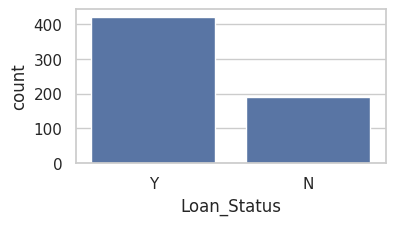

In [ ]:
# Ploting the Loan_Status column to know the propotion of accepted and rejected proposals

plt.figure(figsize=(4,2))
sns.set(style="whitegrid")
sns.countplot(x=dataframe_1[cv[-1]])
print(dataframe_1[cv[-1]].value_counts())
plt.show()

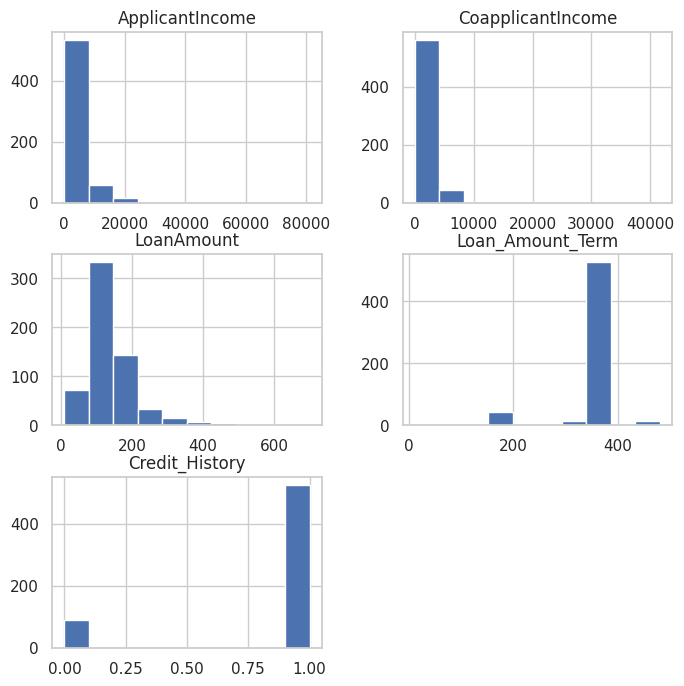

In [ ]:
# plot histograms for numeric variable
dataframe_1.hist(figsize = (8, 8))
plt.show()

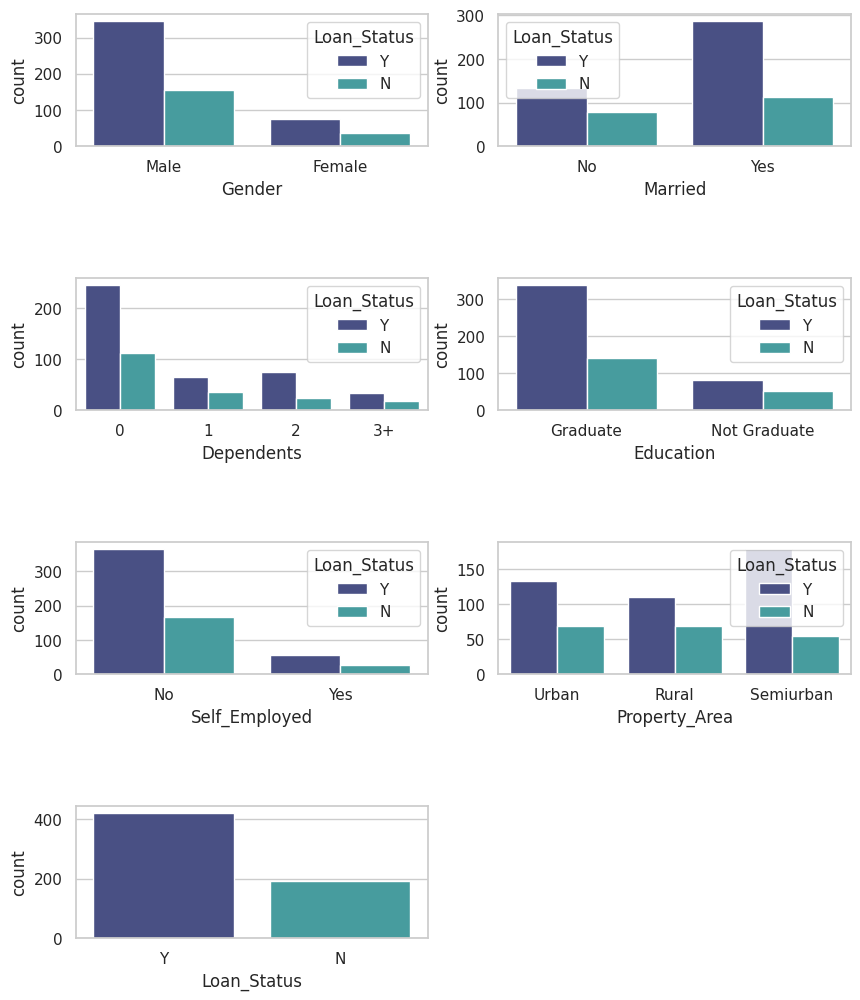

In [ ]:
#Categorical Value Plots
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
fig, axes = plt.subplots(4, 2, figsize=(10, 12))

for idx, cv_col in enumerate(categorical_columns):
    row, col = idx // 2, idx % 2
    sns.countplot(x=cv_col, data=dataframe_1, hue='Loan_Status', ax=axes[row, col], palette='mako')

axes[3, 1].set_visible(False)

plt.subplots_adjust(hspace=1)
plt.show()


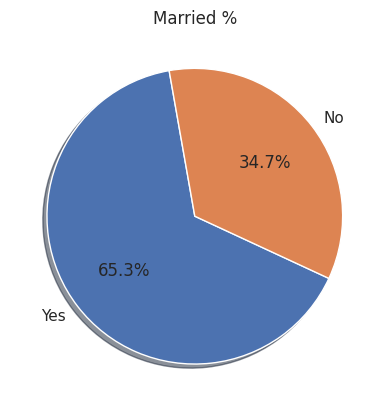

In [ ]:
# Visualization in pie chart using the plt.pie function

plt.pie(dataframe_1["Married"].value_counts(),shadow=True,autopct="%1.1f%%",radius=1,startangle=100,labels=["Yes","No"])
plt.title("Married %")
plt.show()

Text(0.5, 1.0, 'Target distribution')

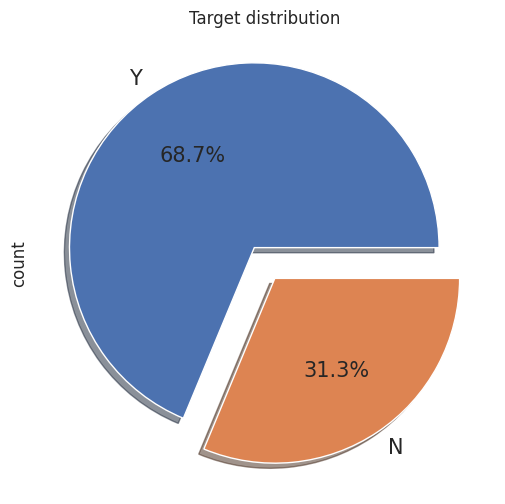

In [ ]:
# Figure size
plt.figure(figsize=(6,6))

# Pie plot
dataframe_1['Loan_Status'].value_counts().plot.pie(explode=[0.1,0.1], autopct='%1.1f%%', shadow=True, textprops={'fontsize':15}).set_title("Target distribution")

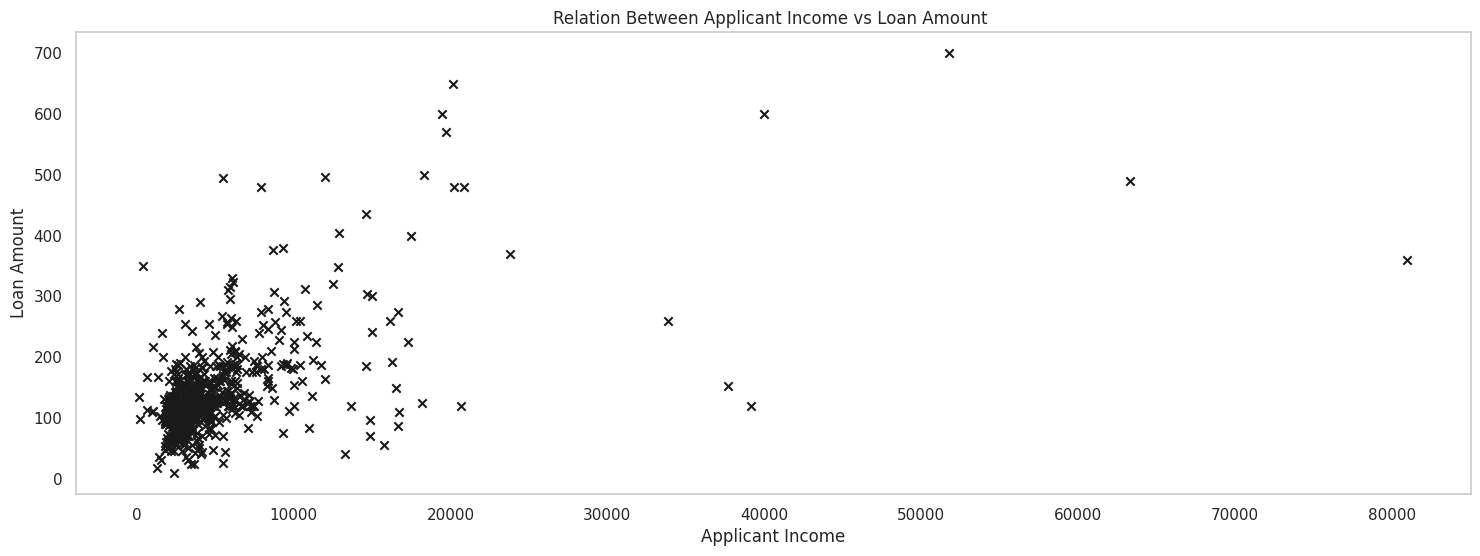

In [ ]:
#scatter plot
plt.figure(figsize=(18, 6))
plt.title("Relation Between Applicant Income vs Loan Amount ")

plt.grid()
plt.scatter(dataframe_1['ApplicantIncome'] , dataframe_1['LoanAmount'], c='k', marker='x')
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

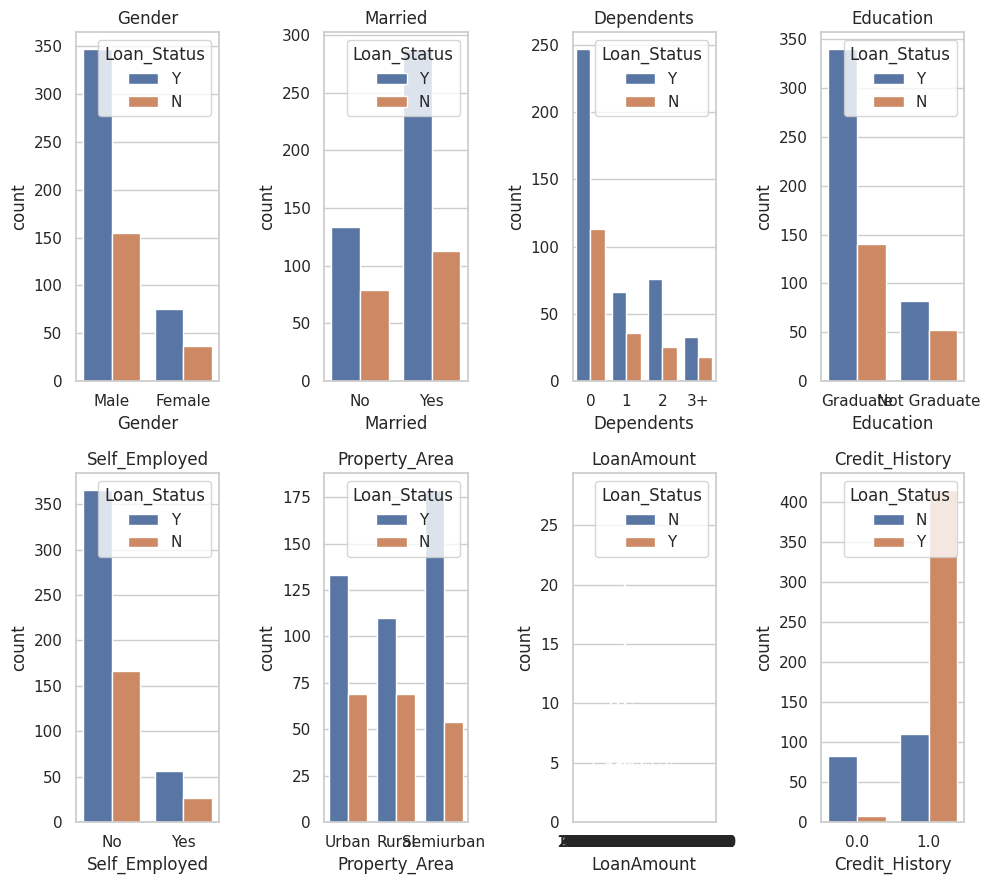

In [ ]:
# Improve appearance

cv_feats = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'LoanAmount','Credit_History']
fig=plt.figure(figsize=(10,9))
for i, var_name in enumerate(cv_feats):
    ax=fig.add_subplot(2,4,i+1)
    sns.countplot(data=dataframe_1, x=var_name, axes=ax, hue='Loan_Status')
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

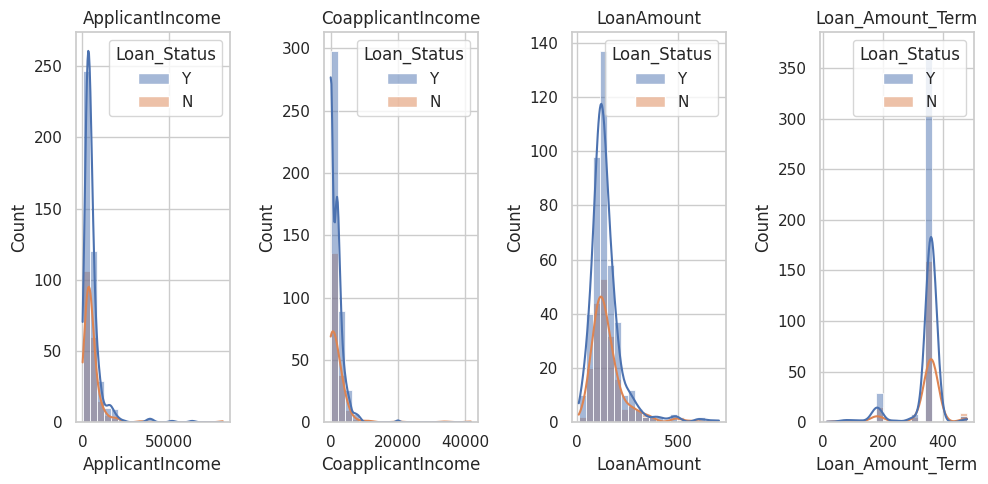

In [ ]:
con_feats=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
fig=plt.figure(figsize=(10,5))
for i, var_name in enumerate(con_feats):
    # Right plot (truncated)
    ax=fig.add_subplot(1,4,i + 1)
    sns.histplot(data=dataframe_1, x=var_name, axes=ax, bins=20, kde=True, hue='Loan_Status')
    ax.set_title(var_name)
fig.tight_layout()  # Improves appearance a bit
plt.show()

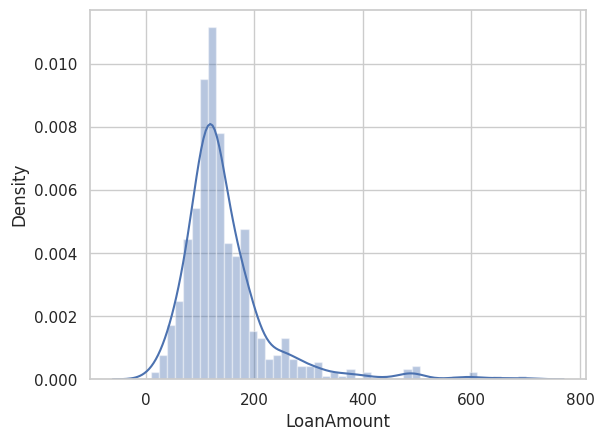

In [ ]:
sns.distplot(dataframe_1["LoanAmount"]);


<Axes: >

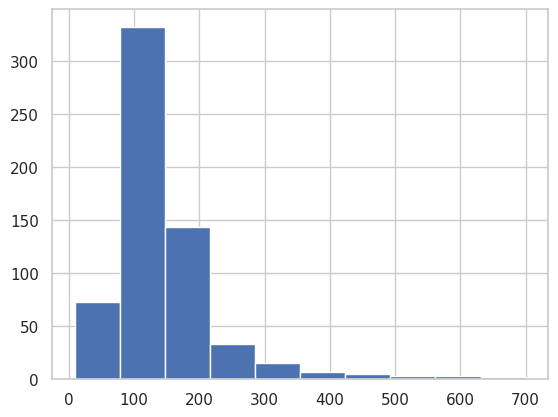

In [ ]:
dataframe_1['LoanAmount'].hist(bins=10)


# Removing the skeweness by doing the log transformation. As we take the log transformation, it does not affect the smaller values much, but reduces the larger values.

<Axes: >

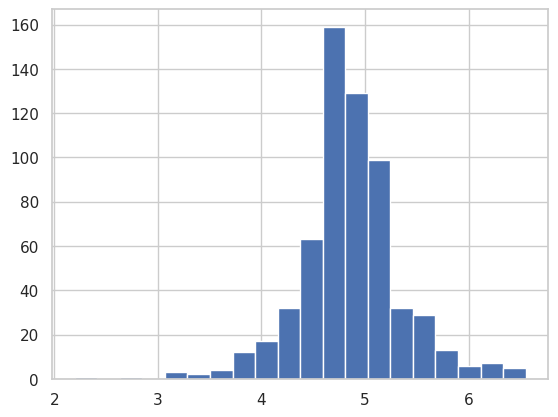

In [ ]:
dataframe_1['LoanAmount'] = np.log(dataframe_1['LoanAmount'])
dataframe_1['LoanAmount'].hist(bins=20)

<Axes: xlabel='LoanAmount', ylabel='Density'>

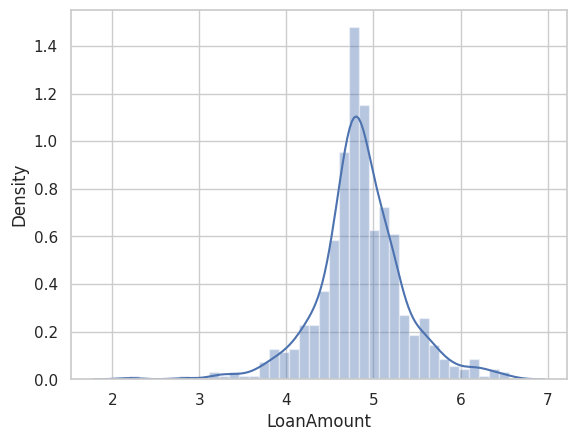

In [ ]:
sns.distplot(dataframe_1["LoanAmount"])


<Axes: >

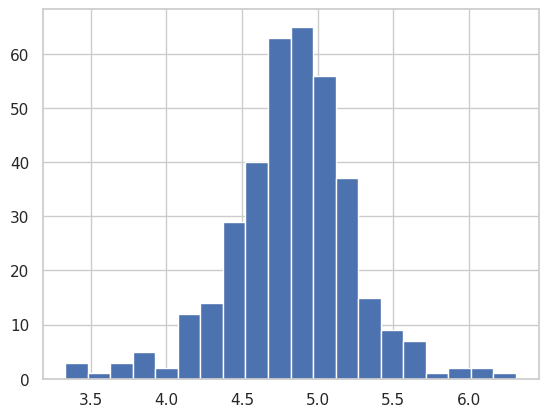

In [ ]:
dataframe_2["LoanAmount"]=np.log(dataframe_2["LoanAmount"])
dataframe_2['LoanAmount'].hist(bins=20)

<Axes: xlabel='LoanAmount', ylabel='Density'>

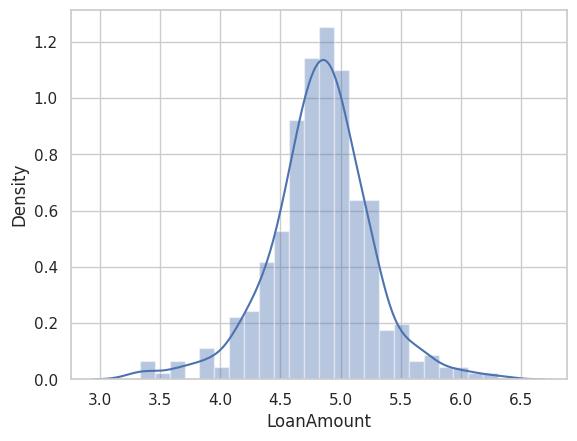

In [ ]:
sns.distplot(dataframe_2["LoanAmount"])


## Convert Categorical variable with Numerical values.

In [ ]:
# Restore Loan_Status from one-hot encoding
if "Loan_Status_1" in dataframe_1.columns:
    dataframe_1["Loan_Status"] = dataframe_1["Loan_Status_1"]  # Assuming 1 means "Y"
    dataframe_1.drop(columns=["Loan_Status_0", "Loan_Status_1"], inplace=True)

if "Loan_Status_1" in dataframe_2.columns:
    dataframe_2["Loan_Status"] = dataframe_2["Loan_Status_1"]
    dataframe_2.drop(columns=["Loan_Status_0", "Loan_Status_1"], inplace=True)

# Restore Gender
if "Gender_1" in dataframe_1.columns:
    dataframe_1["Gender"] = dataframe_1["Gender_1"]
    dataframe_1.drop(columns=["Gender_0", "Gender_1"], inplace=True)

if "Gender_1" in dataframe_2.columns:
    dataframe_2["Gender"] = dataframe_2["Gender_1"]
    dataframe_2.drop(columns=["Gender_0", "Gender_1"], inplace=True)

# Restore Married
if "Married_1" in dataframe_1.columns:
    dataframe_1["Married"] = dataframe_1["Married_1"]
    dataframe_1.drop(columns=["Married_0", "Married_1"], inplace=True)

if "Married_1" in dataframe_2.columns:
    dataframe_2["Married"] = dataframe_2["Married_1"]
    dataframe_2.drop(columns=["Married_0", "Married_1"], inplace=True)

# Restore Self_Employed
if "Self_Employed_1" in dataframe_1.columns:
    dataframe_1["Self_Employed"] = dataframe_1["Self_Employed_1"]
    dataframe_1.drop(columns=["Self_Employed_0", "Self_Employed_1"], inplace=True)

if "Self_Employed_1" in dataframe_2.columns:
    dataframe_2["Self_Employed"] = dataframe_2["Self_Employed_1"]
    dataframe_2.drop(columns=["Self_Employed_0", "Self_Employed_1"], inplace=True)



In [ ]:
# convert Categorical variable with Numerical values.
dataframe_1.Loan_Status = dataframe_1.Loan_Status.replace({"Y": 1, "N" : 0})
#dataframe_2.Loan_Status = dataframe_2.Loan_Status.replace({"Y": 1, "N" : 0})

dataframe_1.Gender = dataframe_1.Gender.replace({"Male": 1, "Female" : 0})
dataframe_2.Gender = dataframe_2.Gender.replace({"Male": 1, "Female" : 0})

dataframe_1.Married = dataframe_1.Married.replace({"Yes": 1, "No" : 0})
dataframe_2.Married = dataframe_2.Married.replace({"Yes": 1, "No" : 0})

dataframe_1.Self_Employed = dataframe_1.Self_Employed.replace({"Yes": 1, "No" : 0})
dataframe_2.Self_Employed = dataframe_2.Self_Employed.replace({"Yes": 1, "No" : 0})

In [ ]:
# Restore Property_Area
if "Property_Area_0" in dataframe_1.columns:
    dataframe_1["Property_Area"] = dataframe_1[["Property_Area_0", "Property_Area_1", "Property_Area_2"]].idxmax(axis=1).str[-1]
    dataframe_1.drop(columns=["Property_Area_0", "Property_Area_1", "Property_Area_2"], inplace=True)

if "Property_Area_0" in dataframe_2.columns:
    dataframe_2["Property_Area"] = dataframe_2[["Property_Area_0", "Property_Area_1", "Property_Area_2"]].idxmax(axis=1).str[-1]
    dataframe_2.drop(columns=["Property_Area_0", "Property_Area_1", "Property_Area_2"], inplace=True)

# Restore Education
if "Education_0" in dataframe_1.columns:
    dataframe_1["Education"] = dataframe_1[["Education_0", "Education_1"]].idxmax(axis=1).str[-1]
    dataframe_1.drop(columns=["Education_0", "Education_1"], inplace=True)

if "Education_0" in dataframe_2.columns:
    dataframe_2["Education"] = dataframe_2[["Education_0", "Education_1"]].idxmax(axis=1).str[-1]
    dataframe_2.drop(columns=["Education_0", "Education_1"], inplace=True)

# Restore Dependents
dependent_columns = [col for col in dataframe_1.columns if "Dependents_" in col]
if dependent_columns:
    dataframe_1["Dependents"] = dataframe_1[dependent_columns].idxmax(axis=1).str[-1]
    dataframe_1.drop(columns=dependent_columns, inplace=True)

dependent_columns = [col for col in dataframe_2.columns if "Dependents_" in col]
if dependent_columns:
    dataframe_2["Dependents"] = dataframe_2[dependent_columns].idxmax(axis=1).str[-1]
    dataframe_2.drop(columns=dependent_columns, inplace=True)

# Convert back to integer if necessary


def convert_to_numeric(df, columns):
    for col in columns:
        if df[col].dtype == 'object':  # Convert only object-type columns
            df[col] = pd.factorize(df[col])[0]  # Encode categorical data
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)  # Convert to integer
    return df


print(dataframe_1["Property_Area"].dtype)
print(dataframe_1["Property_Area"].unique())

# dataframe_1["Property_Area"] = dataframe_1["Property_Area"].astype(int)
# dataframe_2["Property_Area"] = dataframe_2["Property_Area"].astype(int)

# dataframe_1["Education"] = dataframe_1["Education"].astype(int)
# dataframe_2["Education"] = dataframe_2["Education"].astype(int)

# dataframe_1["Dependents"] = dataframe_1["Dependents"].astype(int)
# dataframe_2["Dependents"] = dataframe_2["Dependents"].astype(int)

columns_to_convert = ["Property_Area", "Education", "Dependents"]

# Apply function to both dataframes
dataframe_1 = convert_to_numeric(dataframe_1, columns_to_convert)
dataframe_2 = convert_to_numeric(dataframe_2, columns_to_convert)


object
['Urban' 'Rural' 'Semiurban']


In [ ]:
#Property_Area, Dependents and Education has multiple values so now we can use LabelEncoder from sklearn package

from sklearn.preprocessing import LabelEncoder
feature_col = ['Property_Area','Education', 'Dependents']
le = LabelEncoder()
for col in feature_col:
    dataframe_1[col] = le.fit_transform(dataframe_1[col])
    dataframe_2[col] = le.fit_transform(dataframe_2[col])

In [ ]:
dataframe_1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,4.787492,360.0,1.0,0,1
1,1,1,1,0,0,4583,1508.0,4.852030,360.0,1.0,1,0
2,1,1,0,0,1,3000,0.0,4.189655,360.0,1.0,0,1
3,1,1,0,1,0,2583,2358.0,4.787492,360.0,1.0,0,1
4,1,0,0,0,0,6000,0.0,4.948760,360.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,4.262680,360.0,1.0,1,1
610,1,1,3,0,0,4106,0.0,3.688879,180.0,1.0,1,1
611,1,1,1,0,0,8072,240.0,5.533389,360.0,1.0,0,1
612,1,1,2,0,0,7583,0.0,5.231109,360.0,1.0,0,1


In [ ]:
dataframe_2

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,4.700480,360.0,1.0,0
1,1,1,1,0,0,3076,1500,4.836282,360.0,1.0,0
2,1,1,2,0,0,5000,1800,5.337538,360.0,1.0,0
3,1,1,2,0,0,2340,2546,4.605170,360.0,1.0,0
4,1,0,0,1,0,3276,0,4.356709,360.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,1,1,4009,1777,4.727388,360.0,1.0,0
363,1,1,0,0,0,4158,709,4.744932,360.0,1.0,0
364,1,0,0,0,0,3250,1993,4.836282,360.0,1.0,1
365,1,1,0,0,0,5000,2393,5.062595,360.0,1.0,2


# Correlation Matrix

<Axes: >

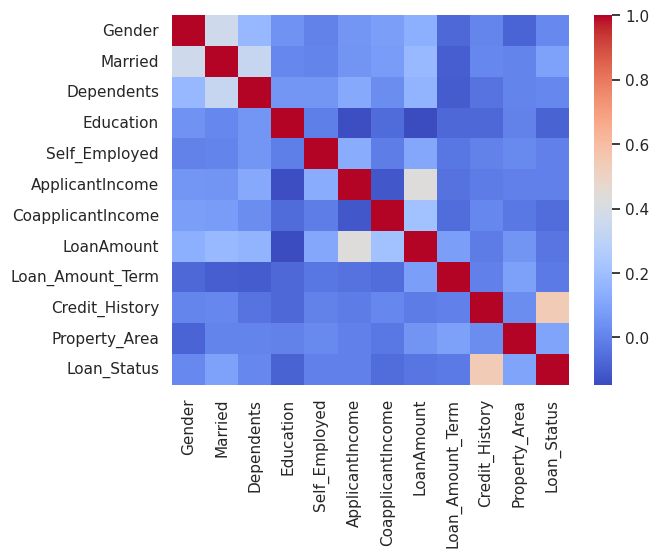

In [ ]:
# Ploting the correaltion matrix
sns.heatmap(dataframe_1.corr() ,cmap='coolwarm')

In [ ]:
# Correlation table for better view
corr = dataframe_1.corr()

corr.style.background_gradient(cmap="coolwarm")

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.142783,-0.074030,0.009170,-0.082045,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.179459,-0.100912,0.010938,0.003071,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.156762,-0.103864,-0.040160,0.001781,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.146964,-0.073928,-0.073658,-0.003592,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.109601,-0.033739,-0.001550,0.021996,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.435261,-0.046531,-0.018615,-0.007894,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.207177,-0.059383,0.011134,-0.028356,-0.059187
LoanAmount,0.142783,0.179459,0.156762,-0.146964,0.109601,0.435261,0.207177,1.000000,0.085630,-0.018052,0.052613,-0.036099
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.085630,1.000000,-0.004705,0.086879,-0.022549
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.018052,-0.004705,1.000000,0.030248,0.540556


**Conclusion from Correlation Matrix:**

From the above two correlation matrix, we can see that credit history has a positive correlation of 0.540556 with the target value Loan_Status. Looking at this, we can say that Loan_Status is more dependent on Credit_History.

#  Machine Learning Algorithms

In [ ]:
#Relevant ML libraries

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score

In [ ]:
# Split the dataSet_1 into features and target
X_train = dataframe_1.drop('Loan_Status', axis=1).values
y_train = dataframe_1['Loan_Status'].values

In [ ]:
# Split the dataSet_2 into features and target
# X_pred = dataframe_1.values
X_pred = dataframe_1.drop('Loan_Status', axis=1).values

In [ ]:
# Preprocess the data (e.g. normalize, standardize, etc.)
X_train = (X_train - X_train.mean()) / X_train.std()
X_pred = (X_pred - X_pred.mean()) / X_pred.std()

In [ ]:
# Split the training dataset into a training set and a validation set
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=1)

# 1. Decision Tree Classifier


In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
tree_model = DecisionTreeClassifier(random_state=1)


In [ ]:
#Fit the model
tree_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
y_pred = tree_model.predict(X_train)
print("Training Data Set Accuracy: ", accuracy_score(y_train,y_pred))
print("Training Data F1 Score ", f1_score(y_train,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(tree_model,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(tree_model,X_train,y_train,cv=5,scoring='accuracy').mean())

Training Data Set Accuracy:  1.0
Training Data F1 Score  1.0
Validation Mean F1 Score:  0.6602586411987476
Validation Mean Accuracy:  0.7062927496580028


In [ ]:
pred=tree_model.predict(X_test)
pred


print(X_test)

[[-0.26026103 -0.26064972 -0.26026103 ... -0.12072145 -0.26026103
  -0.25987234]
 [-0.26064972 -0.26026103 -0.26064972 ... -0.12072145 -0.26026103
  -0.25987234]
 [-0.26026103 -0.26064972 -0.26064972 ... -0.12072145 -0.26026103
  -0.26064972]
 ...
 [-0.26026103 -0.26026103 -0.26064972 ... -0.12072145 -0.26026103
  -0.26064972]
 [-0.26026103 -0.26026103 -0.26064972 ... -0.12072145 -0.26026103
  -0.26026103]
 [-0.26026103 -0.26026103 -0.26064972 ... -0.12072145 -0.26026103
  -0.26064972]]


In [ ]:
Accuracy =accuracy_score(pred,y_test)*100
Accuracy


72.97297297297297

In [ ]:
# Predictions for the test dataset.

pred_test = tree_model.predict(X_pred)
pred_test[16:20]

array([1, 0, 0, 0])

In [ ]:
#Checking the r squared value through this model
r2 = tree_model.score(X_test, y_test)
r2

0.7297297297297297

# 2. Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
logistic_model = LogisticRegression()


In [ ]:
logistic_model.fit(X_train, y_train)


LogisticRegression()

In [ ]:
# Predict the model for testing data of train_test split set
y_pred = logistic_model.predict(X_test)

In [ ]:
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('LR accuracy: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       1.00      0.02      0.03        61
           1       0.67      1.00      0.81       124

    accuracy                           0.68       185
   macro avg       0.84      0.51      0.42       185
weighted avg       0.78      0.68      0.55       185

[[  1  60]
 [  0 124]]
LR accuracy: 67.57%


In [ ]:
r2 = logistic_model.score(X_test, y_test)
r2

0.6756756756756757

In [ ]:
# Predict the model for data

predicted = logistic_model.predict(X_pred)

In [ ]:
predicted
predicted[16:20]

array([1, 1, 1, 1])

In [ ]:
#Training the model with few key features now

train_features = ['Credit_History', 'Gender', 'ApplicantIncome']
train_data = dataframe_1
test_data = dataframe_2

X_train = train_data[train_features].values
y_train = train_data['Loan_Status'].values

X_pred = test_data[train_features].values
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)

In [ ]:
logistic_model.fit(X_train, y_train)


LogisticRegression()

In [ ]:
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('LR accuracy: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.93      0.43      0.59        30
           1       0.84      0.99      0.91        93

    accuracy                           0.85       123
   macro avg       0.89      0.71      0.75       123
weighted avg       0.86      0.85      0.83       123

[[13 17]
 [ 1 92]]
LR accuracy: 85.37%


In [ ]:
# Predict the model for test data

predicted = logistic_model.predict(X_pred)
predicted

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
r2 = logistic_model.score(X_test, y_test)
r2

0.8536585365853658

# 3. Random Forest Classifier


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,test_size=0.3,random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score

rf_clf = RandomForestClassifier(n_estimators=100,max_depth=3,min_samples_leaf = 10)
rf_clf.fit(X_train,y_train)
y_pred = rf_clf.predict(X_train)
print("Train F1 Score ", f1_score(y_train,y_pred))
print("Train Accuracy ", accuracy_score(y_train,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(rf_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(rf_clf,X_train,y_train,cv=5,scoring='accuracy').mean())

Train F1 Score  0.8876404494382022
Train Accuracy  0.8250728862973761
Validation Mean F1 Score:  0.7390049143059283
Validation Mean Accuracy:  0.8220375106564365


In [ ]:
y_pred = rf_clf.predict(X_test)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.7364864864864865
Test F1 Score:  0.8151658767772512
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,23,38,61
1,1,86,87
All,24,124,148


In [ ]:
pred_test = rf_clf.predict(X_pred)


In [ ]:
pred_test

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
len(pred_test)

367

In [ ]:
r2 = rf_clf.score(X_test, y_test)
r2

0.7364864864864865

**Looking at all the algorithms, we can see that Logistic Regression has the highest accuracy of 85.36%.**